In [1]:
import sklearn, numpy as np, scipy as scp, pandas as pd, matplotlib.pyplot as plt, matplotlib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, Binarizer
from sklearn.linear_model import LogisticRegression
import yfinance as yf

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, Normalizer, MinMaxScaler
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.utils import resample

margin = 0
'''
margin, accuracy
----------------
-1, 53%
0, 54%
1. 46%
3, 52%
5, 53%
7, 62%
9, 65%
10, 64%
12, 59%
15, 87%
17, 93%
'''

'\nmargin, accuracy\n----------------\n-1, 53%\n0, 54%\n1. 46%\n3, 52%\n5, 53%\n7, 62%\n9, 65%\n10, 64%\n12, 59%\n15, 87%\n17, 93%\n'

In [2]:
# load data
tsla = yf.Ticker('TSLA')
tsla.info

{'address1': '1 Tesla Road',
 'city': 'Austin',
 'state': 'TX',
 'zip': '78725',
 'country': 'United States',
 'phone': '512 516 8177',
 'website': 'https://www.tesla.com',
 'industry': 'Auto Manufacturers',
 'industryDisp': 'Auto Manufacturers',
 'sector': 'Consumer Cyclical',
 'longBusinessSummary': 'Tesla, Inc. designs, develops, manufactures, leases, and sells electric vehicles, and energy generation and storage systems in the United States, China, and internationally. It operates in two segments, Automotive, and Energy Generation and Storage. The Automotive segment offers electric vehicles, as well as sells automotive regulatory credits; and non-warranty after-sales vehicle, used vehicles, retail merchandise, and vehicle insurance services. This segment also provides sedans and sport utility vehicles through direct and used vehicle sales, a network of Tesla Superchargers, and in-app upgrades; purchase financing and leasing services; services for electric vehicles through its compa

In [3]:
tsla.history(period='1y')

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2022-06-07 00:00:00-04:00,234.000000,239.996674,230.093338,238.886673,72808500,0.0,0.0
2022-06-08 00:00:00-04:00,240.086670,249.963333,239.176666,241.866669,76210500,0.0,0.0
2022-06-09 00:00:00-04:00,249.339996,255.546661,239.326660,239.706665,96491400,0.0,0.0
2022-06-10 00:00:00-04:00,235.156662,239.500000,227.913330,232.229996,97536600,0.0,0.0
2022-06-13 00:00:00-04:00,223.166672,226.633331,214.683334,215.736664,102767400,0.0,0.0
...,...,...,...,...,...,...,...
2023-05-31 00:00:00-04:00,199.779999,203.949997,195.119995,203.929993,150711700,0.0,0.0
2023-06-01 00:00:00-04:00,202.589996,209.800003,199.369995,207.520004,148029900,0.0,0.0
2023-06-02 00:00:00-04:00,210.149994,217.250000,209.750000,213.970001,164129000,0.0,0.0


In [24]:
# get history
data = tsla.history(period='1y')
data = data[['Open', 'High', 'Low', 'Close', 'Volume']]

In [25]:
data.head()

,Open,High,Low,Close,Volume
Date,,,,,
2022-06-07 00:00:00-04:00,234.000000,239.996674,230.093338,238.886673,72808500
2022-06-08 00:00:00-04:00,240.086670,249.963333,239.176666,241.866669,76210500
2022-06-09 00:00:00-04:00,249.339996,255.546661,239.326660,239.706665,96491400
2022-06-10 00:00:00-04:00,235.156662,239.500000,227.913330,232.229996,97536600
2022-06-13 00:00:00-04:00,223.166672,226.633331,214.683334,215.736664,102767400


In [26]:
data['close_yesterday'] = data['Close'].shift(1, fill_value=0)

In [27]:
data.head()

,Open,High,Low,Close,Volume,close_yesterday
Date,,,,,,
2022-06-07 00:00:00-04:00,234.000000,239.996674,230.093338,238.886673,72808500,0.000000
2022-06-08 00:00:00-04:00,240.086670,249.963333,239.176666,241.866669,76210500,238.886673
2022-06-09 00:00:00-04:00,249.339996,255.546661,239.326660,239.706665,96491400,241.866669
2022-06-10 00:00:00-04:00,235.156662,239.500000,227.913330,232.229996,97536600,239.706665
2022-06-13 00:00:00-04:00,223.166672,226.633331,214.683334,215.736664,102767400,232.229996


In [28]:
data['volume_yesterday'] = data['Volume'].shift(1, fill_value = 0)
data['high_yesterday'] = data['High'].shift(1, fill_value=0)
data['low_yesterday'] = data['Low'].shift(1, fill_value=0)
data['open_yesterday'] = data['Open'].shift(1, fill_value=0)

In [29]:
# creating target column
data['target_value'] = data.apply(lambda row: row.Close - row.Open, axis=1)
data.head(10)

,Open,High,Low,Close,Volume,close_yesterday,volume_yesterday,high_yesterday,low_yesterday,open_yesterday,target_value
Date,,,,,,,,,,,
2022-06-07 00:00:00-04:00,234.000000,239.996674,230.093338,238.886673,72808500,0.000000,0,0.000000,0.000000,0.000000,4.886673
2022-06-08 00:00:00-04:00,240.086670,249.963333,239.176666,241.866669,76210500,238.886673,72808500,239.996674,230.093338,234.000000,1.779999
2022-06-09 00:00:00-04:00,249.339996,255.546661,239.326660,239.706665,96491400,241.866669,76210500,249.963333,239.176666,240.086670,-9.633331
2022-06-10 00:00:00-04:00,235.156662,239.500000,227.913330,232.229996,97536600,239.706665,96491400,255.546661,239.326660,249.339996,-2.926666
2022-06-13 00:00:00-04:00,223.166672,226.633331,214.683334,215.736664,102767400,232.229996,97536600,239.500000,227.913330,235.156662,-7.430008
2022-06-14 00:00:00-04:00,218.286667,226.330002,211.736664,220.889999,97988700,215.736664,102767400,226.633331,214.683334,223.166672,2.603333
2022-06-15 00:00:00-04:00,220.916672,235.663330,218.149994,233.000000,119131800,220.889999,97988700,226.330002,211.736664,218.286667,12.083328
2022-06-16 00:00:00-04:00,222.736664,225.166672,208.693329,213.100006,107390700,233.000000,119131800,235.663330,218.149994,220.916672,-9.636658
2022-06-17 00:00:00-04:00,213.433334,220.970001,213.196671,216.759995,92641800,213.100006,107390700,225.166672,208.693329,222.736664,3.326660


In [30]:
data.describe()

,Open,High,Low,Close,Volume,close_yesterday,volume_yesterday,high_yesterday,low_yesterday,open_yesterday,target_value
count,251.000000,251.000000,251.000000,251.000000,2.510000e+02,251.000000,2.510000e+02,251.000000,251.000000,251.000000,251.000000
mean,209.791275,214.662762,204.676055,209.738420,1.178328e+08,208.856707,1.172612e+08,213.778698,203.829322,208.930159,-0.052855
std,50.944448,51.645891,50.237481,50.848567,4.863618e+07,52.537810,4.917374e+07,53.391237,51.869134,52.635355,6.545419
min,103.000000,111.750000,101.809998,108.099998,4.186470e+07,0.000000,0.000000e+00,0.000000,0.000000,0.000000,-19.019989
25%,176.635002,182.419998,172.504997,178.474998,8.006860e+07,177.744995,7.985170e+07,182.144997,172.474998,176.085007,-4.070007
50%,198.539993,203.000000,192.889999,197.580002,1.073907e+08,197.369995,1.055925e+08,202.690002,192.880005,197.929993,0.220001
75%,240.043335,246.751663,234.588333,239.886665,1.503164e+08,239.886665,1.503164e+08,246.751663,234.588333,240.043335,4.049995
max,311.666656,314.666656,305.579987,309.320007,3.065906e+08,309.320007,3.065906e+08,314.666656,305.579987,311.666656,17.309998


In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2022-06-07 00:00:00-04:00 to 2023-06-06 00:00:00-04:00
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Open              251 non-null    float64
 1   High              251 non-null    float64
 2   Low               251 non-null    float64
 3   Close             251 non-null    float64
 4   Volume            251 non-null    int64  
 5   close_yesterday   251 non-null    float64
 6   volume_yesterday  251 non-null    int64  
 7   high_yesterday    251 non-null    float64
 8   low_yesterday     251 non-null    float64
 9   open_yesterday    251 non-null    float64
 10  target_value      251 non-null    float64
dtypes: float64(9), int64(2)
memory usage: 23.5 KB


In [32]:
data.isnull().sum()

Open                0
High                0
Low                 0
Close               0
Volume              0
close_yesterday     0
volume_yesterday    0
high_yesterday      0
low_yesterday       0
open_yesterday      0
target_value        0
dtype: int64

In [33]:
data['target_classifier'] = data.apply(lambda row: 1 if(row.target_value > margin) else 0, axis = 1)

In [34]:
data.head()

,Open,High,Low,Close,Volume,close_yesterday,volume_yesterday,high_yesterday,low_yesterday,open_yesterday,target_value,target_classifier
Date,,,,,,,,,,,,
2022-06-07 00:00:00-04:00,234.000000,239.996674,230.093338,238.886673,72808500,0.000000,0,0.000000,0.000000,0.000000,4.886673,1
2022-06-08 00:00:00-04:00,240.086670,249.963333,239.176666,241.866669,76210500,238.886673,72808500,239.996674,230.093338,234.000000,1.779999,1
2022-06-09 00:00:00-04:00,249.339996,255.546661,239.326660,239.706665,96491400,241.866669,76210500,249.963333,239.176666,240.086670,-9.633331,0
2022-06-10 00:00:00-04:00,235.156662,239.500000,227.913330,232.229996,97536600,239.706665,96491400,255.546661,239.326660,249.339996,-2.926666,0
2022-06-13 00:00:00-04:00,223.166672,226.633331,214.683334,215.736664,102767400,232.229996,97536600,239.500000,227.913330,235.156662,-7.430008,0


In [35]:
data.tail()

,Open,High,Low,Close,Volume,close_yesterday,volume_yesterday,high_yesterday,low_yesterday,open_yesterday,target_value,target_classifier
Date,,,,,,,,,,,,
2023-05-31 00:00:00-04:00,199.779999,203.949997,195.119995,203.929993,150711700,201.160004,128818700,204.479996,197.529999,200.100006,4.149994,1
2023-06-01 00:00:00-04:00,202.589996,209.800003,199.369995,207.520004,148029900,203.929993,150711700,203.949997,195.119995,199.779999,4.930008,1
2023-06-02 00:00:00-04:00,210.149994,217.250000,209.750000,213.970001,164129000,207.520004,148029900,209.800003,199.369995,202.589996,3.820007,1
2023-06-05 00:00:00-04:00,217.800003,221.289993,214.520004,217.610001,151143100,213.970001,164129000,217.250000,209.750000,210.149994,-0.190002,0
2023-06-06 00:00:00-04:00,216.139999,221.899994,212.529999,221.309998,143483212,217.610001,151143100,221.289993,214.520004,217.800003,5.169998,1


array([[<AxesSubplot:title={'center':'Open'}>,
        <AxesSubplot:title={'center':'High'}>,
        <AxesSubplot:title={'center':'Low'}>],
       [<AxesSubplot:title={'center':'Close'}>,
        <AxesSubplot:title={'center':'Volume'}>,
        <AxesSubplot:title={'center':'close_yesterday'}>],
       [<AxesSubplot:title={'center':'volume_yesterday'}>,
        <AxesSubplot:title={'center':'high_yesterday'}>,
        <AxesSubplot:title={'center':'low_yesterday'}>],
       [<AxesSubplot:title={'center':'open_yesterday'}>,
        <AxesSubplot:title={'center':'target_value'}>,
        <AxesSubplot:title={'center':'target_classifier'}>]], dtype=object)

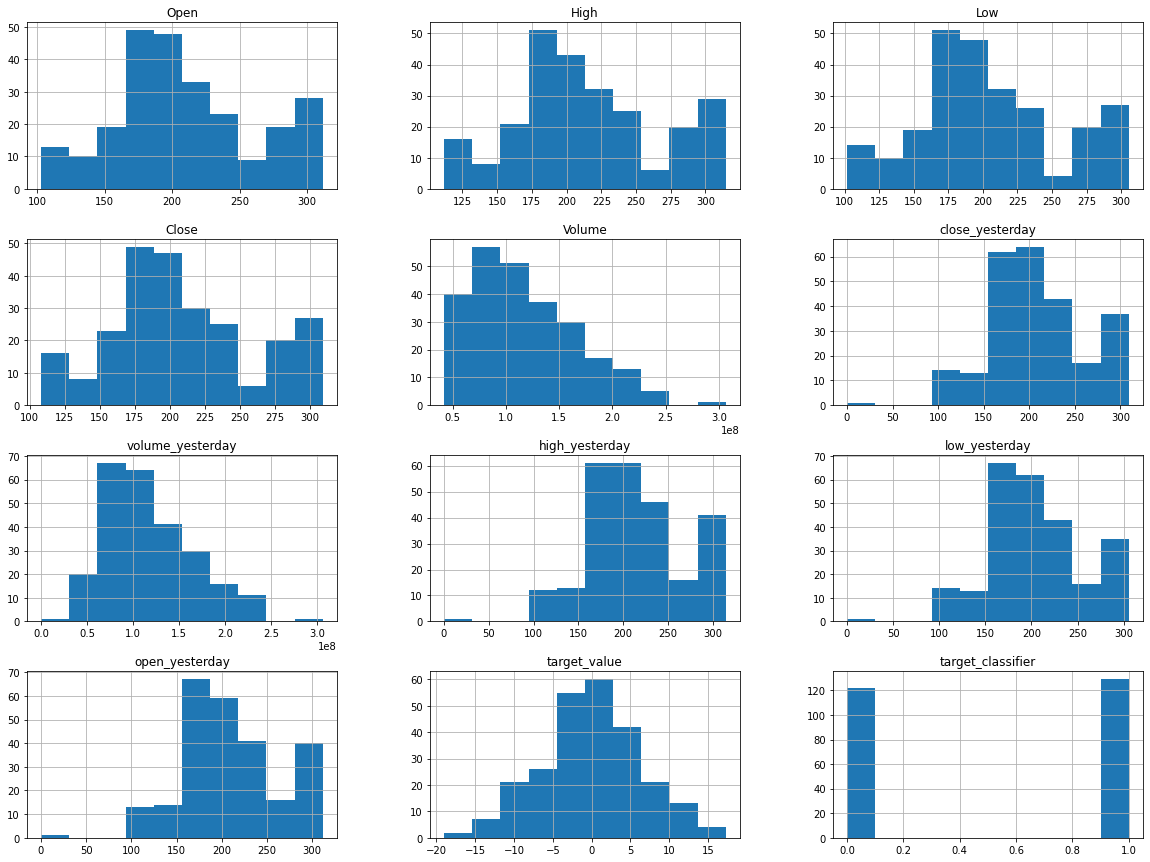

In [36]:
data.hist(figsize=(20,15))

array([[<AxesSubplot:title={'center':'Open'}>,
        <AxesSubplot:title={'center':'High'}>,
        <AxesSubplot:title={'center':'Low'}>],
       [<AxesSubplot:title={'center':'Close'}>,
        <AxesSubplot:title={'center':'Volume'}>,
        <AxesSubplot:title={'center':'close_yesterday'}>],
       [<AxesSubplot:title={'center':'volume_yesterday'}>,
        <AxesSubplot:title={'center':'high_yesterday'}>,
        <AxesSubplot:title={'center':'low_yesterday'}>],
       [<AxesSubplot:title={'center':'open_yesterday'}>,
        <AxesSubplot:title={'center':'target_value'}>,
        <AxesSubplot:title={'center':'target_classifier'}>]], dtype=object)

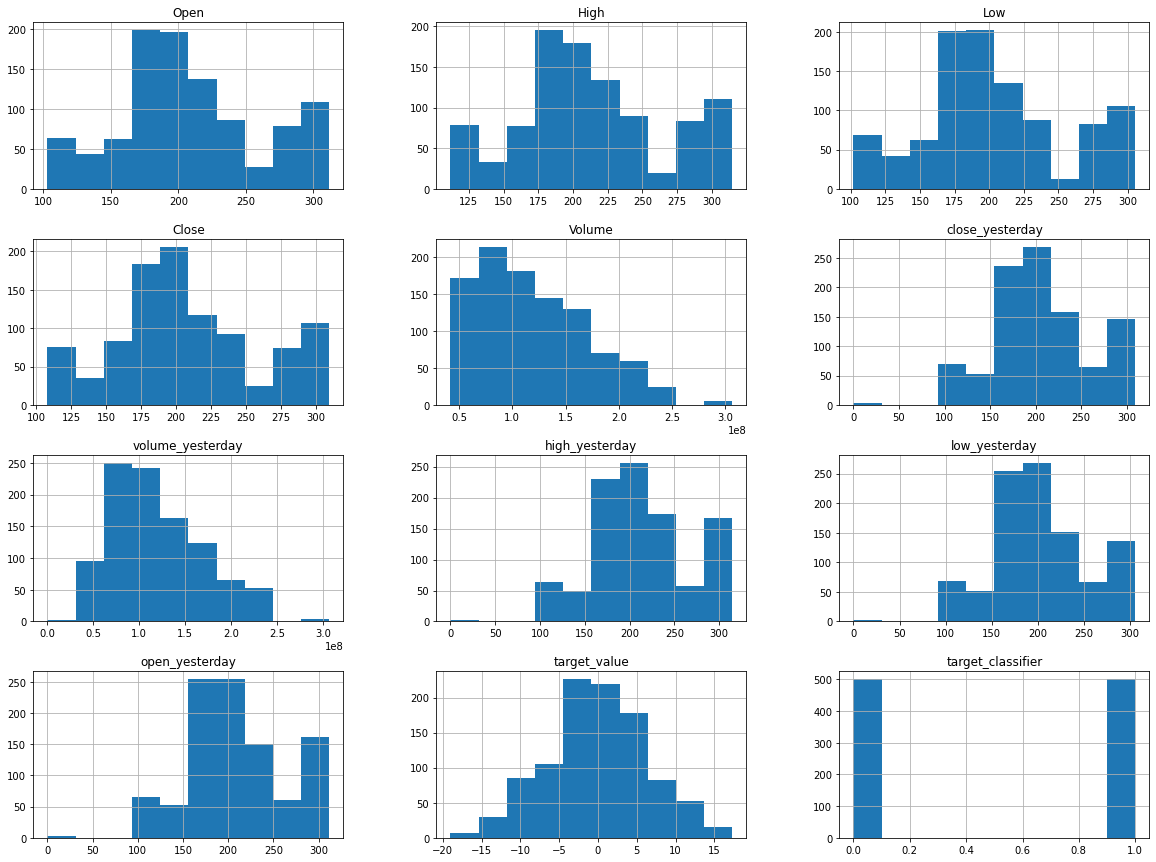

In [17]:
# upsample and desample to make classes balanced
# assumes target is at the end of the row
data_1 = data[data.iloc[:,-1] == 1]
data_0 = data[data.iloc[:,-1] == 0]

data_1_normalized = resample(data_1, replace=True, n_samples=1000)
data_0_normalized = resample(data_0, replace=True, n_samples=1000)

data = pd.concat([data_1_normalized, data_0_normalized])
data.hist(figsize=(20,15))

In [18]:
def heatmap(data, row_labels, col_labels, figsize = (20,12), cmap = "YlGn",
            cbar_kw={}, cbarlabel="", valfmt="{x:.2f}",
            textcolors=("black", "white"), threshold=None):
    """
    Create a heatmap from a numpy array and two lists of labels. 
    
    Taken from matplotlib example.

    Parameters
    ----------
    data
        A 2D numpy array of shape (M, N).
    row_labels
        A list or array of length M with the labels for the rows.
    col_labels
        A list or array of length N with the labels for the columns.
    ax
        A `matplotlib.axes.Axes` instance to which the heatmap is plotted.  If
        not provided, use current axes or create a new one.  Optional.
    cmap
        A string that specifies the colormap to use. Look at matplotlib docs for information.
        Optional.
    cbar_kw
        A dictionary with arguments to `matplotlib.Figure.colorbar`.  Optional.
    cbarlabel
        The label for the colorbar.  Optional.
    valfmt
        The format of the annotations inside the heatmap.  This should either
        use the string format method, e.g. "$ {x:.2f}", or be a
        `matplotlib.ticker.Formatter`.  Optional.
    textcolors
        A pair of colors.  The first is used for values below a threshold,
        the second for those above.  Optional.
    threshold
        Value in data units according to which the colors from textcolors are
        applied.  If None (the default) uses the middle of the colormap as
    """

    plt.figure(figsize = figsize)
    ax = plt.gca()

    # Plot the heatmap
    im = ax.imshow(data,cmap=cmap)

    # Create colorbar
    cbar = ax.figure.colorbar(im, ax=ax, **cbar_kw)
    cbar.ax.set_ylabel(cbarlabel, rotation=-90, va="bottom")

    # Show all ticks and label them with the respective list entries.
    ax.set_xticks(np.arange(data.shape[1]), labels=col_labels)
    ax.set_yticks(np.arange(data.shape[0]), labels=row_labels)

    # Let the horizontal axes labeling appear on top.
    ax.tick_params(top=True, bottom=False,
                   labeltop=True, labelbottom=False)

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=-30, ha="right",
             rotation_mode="anchor")

    # Turn spines off and create white grid.
    ax.spines[:].set_visible(False)

    ax.set_xticks(np.arange(data.shape[1]+1)-.5, minor=True)
    ax.set_yticks(np.arange(data.shape[0]+1)-.5, minor=True)
    ax.grid(which="minor", color="w", linestyle='-', linewidth=3)
    ax.tick_params(which="minor", bottom=False, left=False)

    
    # Normalize the threshold to the images color range.
    if threshold is not None:
        threshold = im.norm(threshold)
    else:
        threshold = im.norm(data.max())/2.

    # Set default alignment to center, but allow it to be
    # overwritten by textkw.
    kw = dict(horizontalalignment="center",
              verticalalignment="center")

    # Get the formatter in case a string is supplied
    if isinstance(valfmt, str):
        valfmt = matplotlib.ticker.StrMethodFormatter(valfmt)

    # Loop over the data and create a `Text` for each "pixel".
    # Change the text's color depending on the data.
    texts = []
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            kw.update(color=textcolors[int(im.norm(data[i, j]) > threshold)])
            text = im.axes.text(j, i, valfmt(data[i, j], None), **kw)
            texts.append(text)

C:\Users\wpags\AppData\Local\Temp\ipykernel_2396\2827038832.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  correlations = data.corrcorrelations = data.corr()


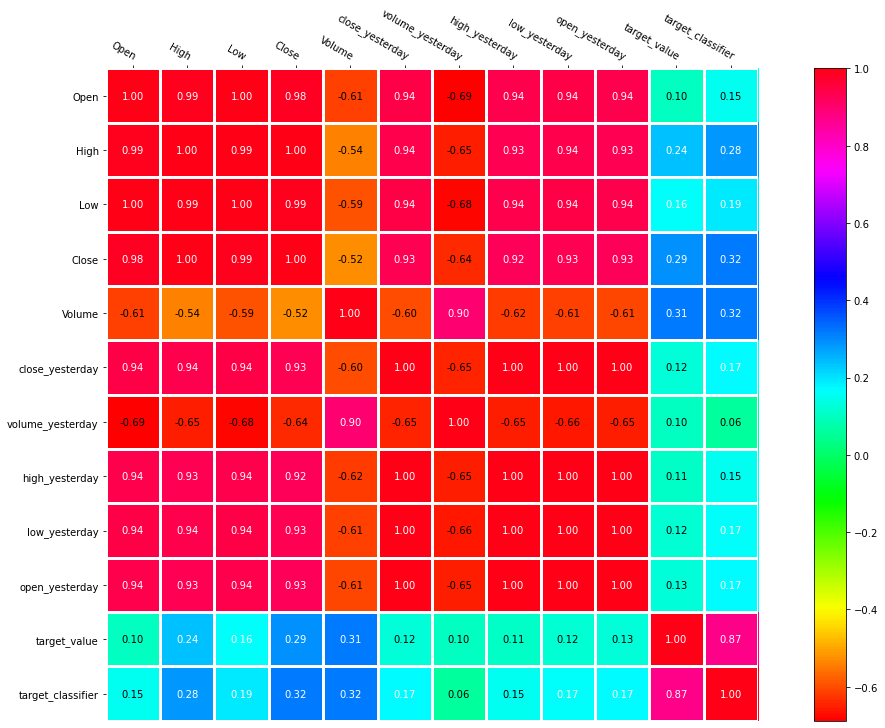

In [19]:
correlations = data.corrcorrelations = data.corr()
columns = list(data)
heatmap(correlations.values,columns,columns,figsize = (20,12),cmap="hsv")

In [64]:
data_prime = data[:-1]

y = data_prime['target_classifier']
x = data_prime.drop(['target_classifier','Open','Close','High','Low','Volume','target_value'],axis=1)
x.head()

,close_yesterday,volume_yesterday,high_yesterday,low_yesterday,open_yesterday
Date,,,,,
2022-06-07 00:00:00-04:00,0.000000,0,0.000000,0.000000,0.000000
2022-06-08 00:00:00-04:00,238.886673,72808500,239.996674,230.093338,234.000000
2022-06-09 00:00:00-04:00,241.866669,76210500,249.963333,239.176666,240.086670
2022-06-10 00:00:00-04:00,239.706665,96491400,255.546661,239.326660,249.339996
2022-06-13 00:00:00-04:00,232.229996,97536600,239.500000,227.913330,235.156662


In [65]:
y = y[:-1]
x = x[:-1]
today = x[-1:]
print(today)

                           close_yesterday  volume_yesterday  high_yesterday  \
Date                                                                           
2023-06-02 00:00:00-04:00       207.520004         148029900      209.800003   

                           low_yesterday  open_yesterday  
Date                                                      
2023-06-02 00:00:00-04:00     199.369995      202.589996  


In [66]:
train_raw, test_raw, target, target_test = train_test_split(x,y, test_size=0.25, random_state=0)

In [67]:
pipeline = Pipeline([
    ('scaler', StandardScaler())
])

#Transform raw data 
train = pipeline.fit_transform(train_raw)
test = pipeline.transform(test_raw)
today = pipeline.transform(today)
print(today)

[[-0.04319338  0.66131916 -0.08953409 -0.10129263 -0.13236957]]


In [68]:
lr = LogisticRegression()
lr.fit(train,target)
predicted = lr.predict(test)
print("%-12s %f" % ('Accuracy:', sklearn.metrics.accuracy_score(target_test,predicted)))

Accuracy:    0.555556


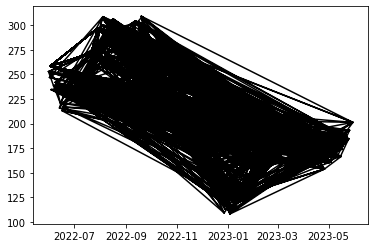

In [24]:
plt.plot(data['Close'],color='black',label='TSLA Stock Price')

In [69]:
today_prediction = lr.predict(today)
if (today_prediction[0] == 0):
    print(f"Don't buy today if you want to make > ${margin}")
else:
    print(f"Buy today to make > ${margin}")

Buy today to make > $0
